In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
pd.options.display.max_columns = None

In [3]:
data = pd.read_csv("data.csv")

In [4]:
# column name change
data.columns = data.columns.str.replace("-","_")

# data.rename({'glyburide-metformin':'glyburide_metformin', 'glipizide-metformin':'glipizide_metformin','glimepiride-pioglitazone':'glimepiride_pioglitazone','metformin-rosiglitazone':'metformin_rosiglitazone', 'metformin-pioglitazone': 'metformin_pioglitazone'}, axis =1, inplace = True)

In [5]:
# duplicate patient_nbr - remove
data.drop_duplicates(['patient_nbr'], inplace = True, ignore_index = True)

In [6]:
# Remove discharge_disposition_id : unique value '13','14','19','20','21' 
is_drop = [item in [13,14,19,20,21] for item in data.discharge_disposition_id]
drop_row_index = [ i for i, is_drop_item in enumerate(is_drop) if is_drop_item]
data.drop(drop_row_index, inplace = True)

In [7]:
# value imputation ==> "?" =? Nan
object_col = data.loc[:,list(data.dtypes == 'object')].columns
for col in object_col:
    data[col] = data[col].str.replace('?', 'Nan')

In [8]:
data.shape

(71050, 50)

### Features description

- admission type(9 distinct value) :  emrgency, urgent, elective, newborn, and not available
- Discharge disposition (29 distinct values) : discharged to home, expired, and not available
- Admission source ( 21 distinct values ) : physician referral, emergency room, and transfer from a hospital
- Time in hospital : number of days between admission and discharge
- Payer code( 23 distinct values ) : Blue Cross/Blue Shield, Medicare, and self-pay
- Medical specialty Integer identifier of a specialty of the admitting physician( 84 distinct values) : cardiology, internal medicine, family/general practice, and surgeon
- num_lab_procedures : Number of lab tests performed during the encounter
- Number of procedures(other than lab tests) performed during the encounter
- Number of medications : - Number of distinct generic names administered during the encounter
- number_outpatient, number_emergency, number_inpatient : visit number
- diag_1	diag_2	diag_3 : The primary, secondary, additional secondary diagnosis
- Number of diagnoses : Number of diagnoses entered to the system
- Glucose serum test result (Indicates the range of the result or if the test was not taken) :“>200,” “>300,” “normal,” and “none” if not measured
- A1c test result : Indicates the range of the result or if the test was not taken : “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

#### value_code
- 9 admission type 
- 29 Discharge disposition
- 21 Admission source 
- 23 Payer code

## Mediacton features

24 kinds of medications
- the amount of dosage is changed : up, down, steady
- if the drug was not prescribed : no

In [9]:
# target variable : readmitted 
#  “<30” : less than 30 days, “>30” :  more than 30 days, and “No” for no record of readmission
data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

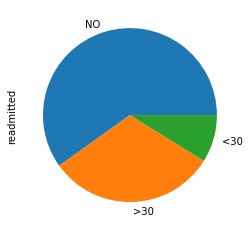

In [10]:
# readmitted ratio in 30 days : 9%
target = data.readmitted.value_counts()
target.plot.pie()

In [11]:
target / target.sum() *100

NO     59.888811
>30    31.276566
<30     8.834624
Name: readmitted, dtype: float64

In [113]:
# Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” ==> 80% "No"
data.metformin.value_counts()
metformin_pl = pd.DataFrame(data.metformin.value_counts()/sum(data.metformin.value_counts())*100)
metformin_pl

,metformin
No,78.947220
Steady,19.266714
Up,1.173821
Down,0.612245


In [119]:
metformin = data[data.metformin == "No"]
metformin.readmitted.value_counts()/len(metformin)*100

NO     59.416673
>30    31.598089
<30     8.985239
Name: readmitted, dtype: float64

In [117]:
metformin = data[data.metformin != "No"]
metformin.readmitted.value_counts()/len(metformin)*100

NO     61.659313
>30    30.070865
<30     8.269822
Name: readmitted, dtype: float64

In [125]:
data.repaglinide.value_counts()
repaglinide = pd.DataFrame(data.repaglinide.value_counts()/sum(data.repaglinide.value_counts())*100)
repaglinide

,repaglinide
No,98.703730
Steady,1.156932
Up,0.099930
Down,0.039409


In [126]:
repaglinide = data[data.repaglinide == "No"]
repaglinide.readmitted.value_counts()/len(repaglinide)*100

NO     60.009411
>30    31.202498
<30     8.788091
Name: readmitted, dtype: float64

In [127]:
repaglinide = data[data.repaglinide != "No"]
repaglinide.readmitted.value_counts()/len(repaglinide)*100

NO     50.705755
>30    36.916395
<30    12.377850
Name: readmitted, dtype: float64

In [128]:
data.nateglinide.value_counts()
nateglinide = pd.DataFrame(data.nateglinide.value_counts()/sum(data.nateglinide.value_counts())*100)
nateglinide

,nateglinide
No,99.301900
Steady,0.664321
Up,0.022519
Down,0.011260


In [129]:
nateglinide = data[data.nateglinide == "No"]
nateglinide.readmitted.value_counts()/len(nateglinide)*100

NO     59.908722
>30    31.248405
<30     8.842872
Name: readmitted, dtype: float64

In [130]:
nateglinide = data[data.nateglinide != "No"]
nateglinide.readmitted.value_counts()/len(nateglinide)*100

NO     57.056452
>30    35.282258
<30     7.661290
Name: readmitted, dtype: float64

In [134]:
data.chlorpropamide.value_counts()
chlorpropamide = pd.DataFrame(data.chlorpropamide.value_counts()/sum(data.chlorpropamide.value_counts())*100)
chlorpropamide

,chlorpropamide
No,99.898663
Steady,0.094300
Up,0.005630
Down,0.001407


In [132]:
chlorpropamide = data[data.chlorpropamide == "No"]
chlorpropamide.readmitted.value_counts()/len(chlorpropamide)*100

NO     59.891797
>30    31.268844
<30     8.839359
Name: readmitted, dtype: float64

In [131]:
chlorpropamide = data[data.chlorpropamide != "No"]
chlorpropamide.readmitted.value_counts()/len(chlorpropamide)*100

NO     56.944444
>30    38.888889
<30     4.166667
Name: readmitted, dtype: float64

In [137]:
data.glimepiride.value_counts()
glimepiride = pd.DataFrame(data.glimepiride.value_counts()/sum(data.glimepiride.value_counts())*100)
glimepiride

,glimepiride
No,94.751583
Steady,4.729064
Up,0.327938
Down,0.191414


In [138]:
glimepiride = data[data.glimepiride == "No"]
glimepiride.readmitted.value_counts()/len(glimepiride)*100

NO     59.942663
>30    31.214628
<30     8.842709
Name: readmitted, dtype: float64

In [139]:
glimepiride = data[data.glimepiride != "No"]
glimepiride.readmitted.value_counts()/len(glimepiride)*100

NO     58.916600
>30    32.394744
<30     8.688656
Name: readmitted, dtype: float64

In [144]:
data.acetohexamide.value_counts()
acetohexamide = pd.DataFrame(data.acetohexamide.value_counts()/sum(data.acetohexamide.value_counts())*100)
acetohexamide

,acetohexamide
No,99.998593
Steady,0.001407


In [145]:
acetohexamide = data[data.acetohexamide == "No"]
acetohexamide.readmitted.value_counts()/len(acetohexamide)*100

NO     59.889654
>30    31.275599
<30     8.834748
Name: readmitted, dtype: float64

In [29]:
acetohexamide = data[data.acetohexamide != "No"]
acetohexamide.readmitted.value_counts()/len(acetohexamide)*100

NO     59.889654
>30    31.275599
<30     8.834748
Name: readmitted, dtype: float64

In [147]:
data.glipizide.value_counts()
glipizide = pd.DataFrame(data.glipizide.value_counts()/sum(data.glipizide.value_counts())*100)
glipizide

,glipizide
No,87.245602
Steady,11.417312
Up,0.810697
Down,0.526390


In [148]:
glipizide = data[data.glipizide == "No"]
glipizide.readmitted.value_counts()/len(glipizide)*100

NO     60.442344
>30    30.846293
<30     8.711363
Name: readmitted, dtype: float64

In [149]:
glipizide = data[data.glipizide != "No"]
glipizide.readmitted.value_counts()/len(glipizide)*100

NO     56.102406
>30    34.219819
<30     9.677775
Name: readmitted, dtype: float64

In [154]:
data.glyburide.value_counts()
glyburide = pd.DataFrame(data.glyburide.value_counts()/sum(data.glyburide.value_counts())*100)
glyburide

,glyburide
No,88.993666
Steady,9.546798
Up,0.868403
Down,0.591133


In [155]:
glyburide = data[data.glyburide == "No"]
glyburide.readmitted.value_counts()/len(glyburide)*100

NO     60.072750
>30    31.152934
<30     8.774316
Name: readmitted, dtype: float64

In [156]:
glyburide = data[data.glyburide != "No"]
glyburide.readmitted.value_counts()/len(glyburide)*100

NO     58.401535
>30    32.276215
<30     9.322251
Name: readmitted, dtype: float64

In [157]:
data.tolbutamide.value_counts()
tolbutamide = pd.DataFrame(data.tolbutamide.value_counts()/sum(data.tolbutamide.value_counts())*100)
tolbutamide

,tolbutamide
No,99.973258
Steady,0.026742


In [158]:
tolbutamide = data[data.tolbutamide == "No"]
tolbutamide.readmitted.value_counts()/len(tolbutamide)*100

NO     59.886528
>30    31.277893
<30     8.835579
Name: readmitted, dtype: float64

In [159]:
tolbutamide = data[data.tolbutamide != "No"]
tolbutamide.readmitted.value_counts()/len(tolbutamide)*100

NO     68.421053
>30    26.315789
<30     5.263158
Name: readmitted, dtype: float64

In [161]:
data.pioglitazone.value_counts()
pioglitazone = pd.DataFrame(data.pioglitazone.value_counts()/sum(data.pioglitazone.value_counts())*100)
pioglitazone

,pioglitazone
No,92.554539
Steady,7.078114
Up,0.253343
Down,0.114004


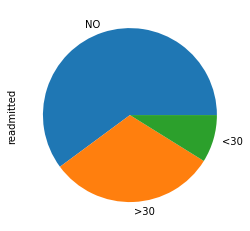

In [40]:
pioglitazone = data[data.pioglitazone == "No"]
pioglitazone.readmitted.value_counts()/len(pioglitazone)*100

In [41]:
pioglitazone = data[data.pioglitazone != "No"]
pioglitazone.readmitted.value_counts()/len(pioglitazone)*100

NO     60.127737
>30    31.024939
<30     8.847324
Name: readmitted, dtype: float64

In [162]:
data.rosiglitazone.value_counts()
rosiglitazone = pd.DataFrame(data.rosiglitazone.value_counts()/sum(data.rosiglitazone.value_counts())*100)
rosiglitazone

,rosiglitazone
No,93.406052
Steady,6.299789
Up,0.190007
Down,0.104152


In [164]:
rosiglitazone = data[data.rosiglitazone == "No"]
rosiglitazone.readmitted.value_counts()/len(rosiglitazone)*100

NO     60.176298
>30    30.983199
<30     8.840503
Name: readmitted, dtype: float64

In [163]:
rosiglitazone = data[data.rosiglitazone != "No"]
rosiglitazone.readmitted.value_counts()/len(rosiglitazone)*100

NO     55.816435
>30    35.432231
<30     8.751334
Name: readmitted, dtype: float64

In [165]:
data.acarbose.value_counts()
acarbose = pd.DataFrame(data.acarbose.value_counts()/sum(data.acarbose.value_counts())*100)
acarbose

,acarbose
No,99.717101
Steady,0.268825
Up,0.014075


In [166]:
acarbose = data[data.acarbose == "No"]
acarbose.readmitted.value_counts()/len(acarbose)*100

NO     59.918983
>30    31.242502
<30     8.838516
Name: readmitted, dtype: float64

In [167]:
acarbose = data[data.acarbose != "No"]
acarbose.readmitted.value_counts()/len(acarbose)*100

NO     49.253731
>30    43.283582
<30     7.462687
Name: readmitted, dtype: float64

In [168]:
data.miglitol.value_counts()
miglitol = pd.DataFrame(data.miglitol.value_counts()/sum(data.miglitol.value_counts())*100)
miglitol

,miglitol
No,99.971851
Steady,0.025334
Down,0.001407
Up,0.001407


In [169]:
miglitol = data[data.miglitol == "No"]
miglitol.readmitted.value_counts()/len(miglitol)*100

NO     59.895819
>30    31.268478
<30     8.835703
Name: readmitted, dtype: float64

In [170]:
miglitol = data[data.miglitol != "No"]
miglitol.readmitted.value_counts()/len(miglitol)*100

>30    60.0
NO     35.0
<30     5.0
Name: readmitted, dtype: float64

In [171]:
data.troglitazone.value_counts()
troglitazone = pd.DataFrame(data.troglitazone.value_counts()/sum(data.troglitazone.value_counts())*100)
troglitazone

,troglitazone
No,99.995778
Steady,0.004222


In [172]:
troglitazone = data[data.troglitazone == "No"]
troglitazone.readmitted.value_counts()/len(troglitazone)*100

NO     59.889932
>30    31.275071
<30     8.834997
Name: readmitted, dtype: float64

In [178]:
troglitazone = data[data.troglitazone != "No"]
troglitazone.readmitted.value_counts()/len(troglitazone)*100

>30    66.666667
NO     33.333333
Name: readmitted, dtype: float64

In [175]:
data.tolazamide.value_counts()
tolazamide = pd.DataFrame(data.tolazamide.value_counts()/sum(data.tolazamide.value_counts())*100)
tolazamide

,tolazamide
No,99.957776
Steady,0.042224


In [179]:
tolazamide = data[data.tolazamide == "No"]
tolazamide.readmitted.value_counts()/len(tolazamide)*100

NO     59.885948
>30    31.277105
<30     8.836947
Name: readmitted, dtype: float64

In [176]:
tolazamide = data[data.tolazamide != "No"]
tolazamide.readmitted.value_counts()/len(tolazamide)*100

NO     66.666667
>30    30.000000
<30     3.333333
Name: readmitted, dtype: float64

In [177]:
data.examide.value_counts()
examide = pd.DataFrame(data.examide.value_counts()/sum(data.examide.value_counts())*100)
examide

,examide
No,100.0


In [180]:
examide = data[data.examide == "No"]
examide.readmitted.value_counts()/len(examide)*100

NO     59.888811
>30    31.276566
<30     8.834624
Name: readmitted, dtype: float64

In [181]:
data.citoglipton.value_counts()
citoglipton = pd.DataFrame(data.citoglipton.value_counts()/sum(data.citoglipton.value_counts())*100)
citoglipton

,citoglipton
No,100.0


In [182]:
citoglipton = data[data.citoglipton == "No"]
citoglipton.readmitted.value_counts()/len(citoglipton)*100

NO     59.888811
>30    31.276566
<30     8.834624
Name: readmitted, dtype: float64

In [183]:
data.insulin.value_counts()
insulin = pd.DataFrame(data.insulin.value_counts()/sum(data.insulin.value_counts())*100)
insulin

,insulin
No,48.859958
Steady,30.917664
Down,10.492611
Up,9.729768


In [184]:
insulin = data[data.insulin == "No"]
insulin.readmitted.value_counts()/len(insulin)*100

NO     61.532479
>30    30.295261
<30     8.172260
Name: readmitted, dtype: float64

In [185]:
insulin = data[data.insulin != "No"]
insulin.readmitted.value_counts()/len(insulin)*100

NO     58.318426
>30    32.214119
<30     9.467456
Name: readmitted, dtype: float64

In [187]:
data.glyburide_metformin.value_counts()
glyburide_metformin = pd.DataFrame(data.glyburide_metformin.value_counts()/sum(data.glyburide_metformin.value_counts())*100)
glyburide_metformin

,glyburide_metformin
No,99.293455
Steady,0.691063
Up,0.009852
Down,0.005630


In [188]:
glyburide_metformin = data[data.glyburide_metformin == "No"]
glyburide_metformin.readmitted.value_counts()/len(glyburide_metformin)*100

NO     59.896808
>30    31.260985
<30     8.842207
Name: readmitted, dtype: float64

In [189]:
glyburide_metformin = data[data.glyburide_metformin != "No"]
glyburide_metformin.readmitted.value_counts()/len(glyburide_metformin)*100

NO     58.764940
>30    33.466135
<30     7.768924
Name: readmitted, dtype: float64

In [191]:
data.glipizide_metformin.value_counts()
glipizide_metformin = pd.DataFrame(data.glipizide_metformin.value_counts()/sum(data.glipizide_metformin.value_counts())*100)
glipizide_metformin

,glipizide_metformin
No,99.990148
Steady,0.009852


In [192]:
glipizide_metformin = data[data.glipizide_metformin == "No"]
glipizide_metformin.readmitted.value_counts()/len(glipizide_metformin)*100

NO     59.890489
>30    31.274017
<30     8.835494
Name: readmitted, dtype: float64

In [193]:
glipizide_metformin = data[data.glipizide_metformin != "No"]
glipizide_metformin.readmitted.value_counts()/len(glipizide_metformin)*100

>30    57.142857
NO     42.857143
Name: readmitted, dtype: float64

In [194]:
data.glimepiride_pioglitazone.value_counts()
glimepiride_pioglitazone = pd.DataFrame(data.glimepiride_pioglitazone.value_counts()/sum(data.glimepiride_pioglitazone.value_counts())*100)
glimepiride_pioglitazone

,glimepiride_pioglitazone
No,100.0


In [195]:
glimepiride_pioglitazone = data[data.metformin_rosiglitazone == "No"]
glimepiride_pioglitazone.readmitted.value_counts()/len(glimepiride_pioglitazone)*100

NO     59.887682
>30    31.277446
<30     8.834872
Name: readmitted, dtype: float64

In [ ]:
data.metformin_rosiglitazone.value_counts()
metformin_rosiglitazone = pd.DataFrame(data.metformin_rosiglitazone.value_counts()/sum(data.metformin_rosiglitazone.value_counts())*100)
metformin_rosiglitazone

In [196]:
# patient ratio in metformin_rosiglitazone == "No"
metformin_rosiglitazone = data[data.metformin_rosiglitazone == "No"]
metformin_rosiglitazone.readmitted.value_counts()/len(metformin_rosiglitazone)*100

NO     59.887682
>30    31.277446
<30     8.834872
Name: readmitted, dtype: float64

In [197]:
metformin_rosiglitazone = data[data.metformin_rosiglitazone != "No"]
metformin_rosiglitazone.readmitted.value_counts()/len(metformin_rosiglitazone)*100

NO    100.0
Name: readmitted, dtype: float64

In [198]:
data.metformin_pioglitazone.value_counts()
metformin_pioglitazone = pd.DataFrame(data.metformin_pioglitazone.value_counts()/sum(data.metformin_pioglitazone.value_counts())*100)
metformin_pioglitazone

,metformin_pioglitazone
No,99.998593
Steady,0.001407


In [199]:
# patient ratio in metformin_pioglita == "No"
metformin_pioglitazone = data[data.metformin_pioglitazone == "No"]
metformin_pioglitazone.readmitted.value_counts()/len(metformin_pioglitazone)*100

NO     59.888246
>30    31.277006
<30     8.834748
Name: readmitted, dtype: float64

In [ ]:
metformin_pioglitazone = data[data.metformin_pioglitazone != "No"]
metformin_pioglitazone.readmitted.value_counts()/len(metformin_pioglitazone)*100

In [201]:
data.change.value_counts()
change = pd.DataFrame(data.change.value_counts()/sum(data.change.value_counts())*100)
change

,change
No,55.173821
Ch,44.826179


In [202]:
# patient ratio in change == "No"
change = data[data.change == "No"]
change.readmitted.value_counts()/len(change)*100

NO     61.597918
>30    29.968623
<30     8.433458
Name: readmitted, dtype: float64

In [203]:
change = data[data.change != "No"]
change.readmitted.value_counts()/len(change)*100

NO     57.785174
>30    32.886433
<30     9.328393
Name: readmitted, dtype: float64

In [204]:
# Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
data.diabetesMed.value_counts()
diabetesMed = pd.DataFrame(data.diabetesMed.value_counts()/sum(data.diabetesMed.value_counts())*100)
diabetesMed

,diabetesMed
Yes,76.004222
No,23.995778


In [206]:
# patient ratio in diabetesMed == "Yes"
diabetesMed = data[data.diabetesMed == "Yes"]
diabetesMed.readmitted.value_counts()/len(diabetesMed)*100

NO     58.148923
>30    32.558656
<30     9.292421
Name: readmitted, dtype: float64

In [207]:
diabetesMed = data[data.diabetesMed != "Yes"]
diabetesMed.readmitted.value_counts()/len(diabetesMed)*100

NO     65.399730
>30    27.215672
<30     7.384597
Name: readmitted, dtype: float64